In [156]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import OneHotEncoder,RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
import warnings
warnings.filterwarnings('ignore')


Objective: Analyze and model data science job salaries to uncover trends,
 identify salary drivers, and predict salaries based on job-related factors.

In [9]:
data = pd.read_csv(r"D:\unified mentor internship\Data Science Job Salaries.csv")

In [10]:
data.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [11]:
data.drop(columns = "Unnamed: 0",inplace=True)

In [12]:
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


## Columns description
work_year: Year of the job role.

experience_level: Entry-level, mid-level, senior, etc.

employment_type: 
PT Part-time
FT Full-time
CT Contract
FL Freelance

job_title: Role title (e.g., Data Scientist, Analyst).

salary: Reported salary.

salary_currency: Currency of salary.

salary_in_usd: Converted salary in USD.

employee_residence: Country of the employee.

remote_ratio: 0 (on-site), 50 (hybrid), 100 (remote).

company_location: Company’s country.

company_size: Small, medium, or large.
S less than 50 employees (small)
M 50 to 250 employees (medium)
L more than 250 employees (large)

## Simple EDA

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 52.3+ KB


Data contains 607 datapoints and 11 features.

In [14]:
data.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

There is no missing values in the dataset.

In [15]:
data.duplicated().sum()

42

There are 42 duplicate entries are in the data.we're going to drop them.

In [16]:
data.drop_duplicates(inplace=True)

In [17]:
data.reset_index(drop=True,inplace=True)

In [18]:
data.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [19]:
data.drop(columns=['salary','salary_currency'],inplace=True)

In [20]:
data.rename(columns={'salary_in_usd':'salary'},inplace=True)

In [23]:
data.head()

,work_year,experience_level,employment_type,job_title,salary,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L


In [24]:
data['Workplace_models'] = data['remote_ratio'].replace({0:'Onsite',50:'Hybrid',100:'Remote'})

In [25]:
data['employment_type'].replace({'FT':'Full Time','PT':'Part Time','CT':'Contract','FL':'Freelance'},inplace=True)
data['experience_level'].replace({'SE':'Senior-level','MI':'Mid-level','EN':'Entry Level','EX':'Executive Level'},inplace=True)
data['company_size'].replace({'M':'Medium','L':'Large','S':'Small'},inplace=True)

In [26]:
data.head()

,work_year,experience_level,employment_type,job_title,salary,employee_residence,remote_ratio,company_location,company_size,Workplace_models
0,2020,Mid-level,Full Time,Data Scientist,79833,DE,0,DE,Large,Onsite
1,2020,Senior-level,Full Time,Machine Learning Scientist,260000,JP,0,JP,Small,Onsite
2,2020,Senior-level,Full Time,Big Data Engineer,109024,GB,50,GB,Medium,Hybrid
3,2020,Mid-level,Full Time,Product Data Analyst,20000,HN,0,HN,Small,Onsite
4,2020,Senior-level,Full Time,Machine Learning Engineer,150000,US,50,US,Large,Hybrid


In [27]:
data.drop(columns=['remote_ratio'],inplace=True)

## Advanced EDA

### Univariate Analysis

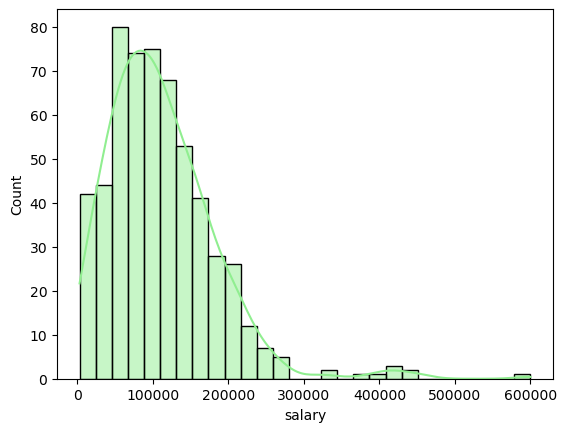

In [28]:
sns.histplot(x = data['salary'],kde=True,color='lightgreen')
plt.show();

In [29]:
data['salary'].skew()

1.7328374573354977

In [33]:
data.head()

,work_year,experience_level,employment_type,job_title,salary,employee_residence,company_location,company_size,Workplace_models
0,2020,Mid-level,Full Time,Data Scientist,79833,DE,DE,Large,Onsite
1,2020,Senior-level,Full Time,Machine Learning Scientist,260000,JP,JP,Small,Onsite
2,2020,Senior-level,Full Time,Big Data Engineer,109024,GB,GB,Medium,Hybrid
3,2020,Mid-level,Full Time,Product Data Analyst,20000,HN,HN,Small,Onsite
4,2020,Senior-level,Full Time,Machine Learning Engineer,150000,US,US,Large,Hybrid


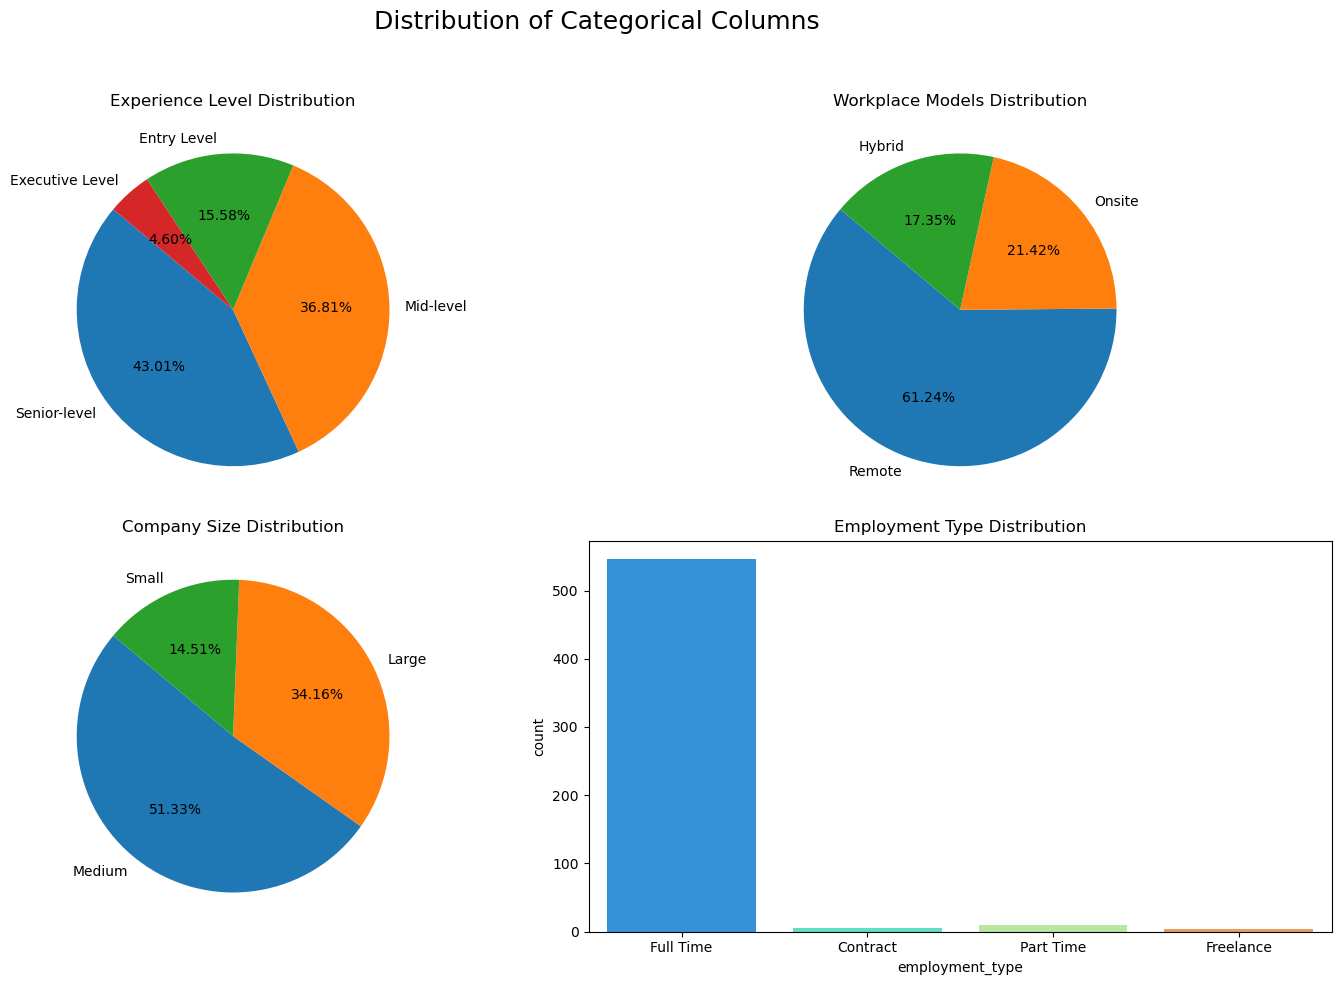

In [53]:
plt.figure(figsize=(15, 10))
plt.suptitle('Distribution of Categorical Columns', fontsize=18)

plt.subplot(2, 2, 1)
level = data['experience_level'].value_counts()
plt.pie(level.values, labels=level.index, autopct='%.2f%%', startangle=140)
plt.title('Experience Level Distribution')

plt.subplot(2, 2, 2)
place = data['Workplace_models'].value_counts()
plt.pie(place.values, labels=place.index, autopct='%.2f%%', startangle=140)
plt.title('Workplace Models Distribution')

plt.subplot(2,2,3)
size = data['company_size'].value_counts()
plt.pie(size.values, labels=size.index, autopct='%.2f%%', startangle=140)
plt.title('Company Size Distribution')

plt.subplot(2, 2, 4)
sns.countplot(x='employment_type', data=data, palette='rainbow')
plt.title('Employment Type Distribution')


plt.tight_layout(rect=[0, 0, 1, 0.95])  
plt.show()


## Univariate Analysis: Key Observations
The salary distribution exhibits positive skewness, with a skewness value of 1.73, indicating that a majority of salaries are concentrated at the lower end while a few high salaries pull the mean upward.

A significant proportion of employees are positioned at the senior level, making it the most common experience level in the dataset.

The remote work model is the predominant mode of work among employees, highlighting a strong preference or shift towards flexible work environments.

Medium-sized companies constitute the majority in terms of company size, suggesting a balanced organizational scale in the dataset.

The most common employment type is full-time, indicating that most professionals are engaged in standard full-time roles rather than part-time, contract, or freelance positions.

### Bivariate Analysis

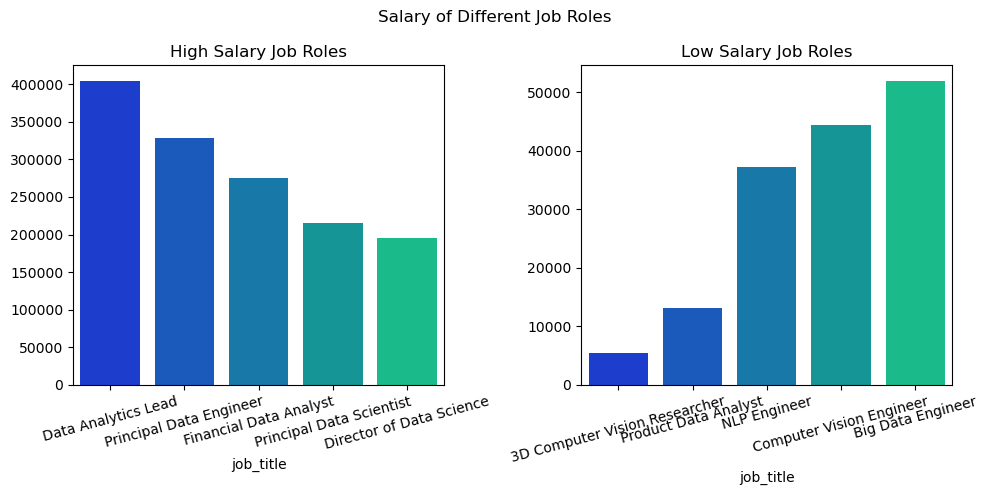

In [87]:
top_job = data.groupby(['job_title'])['salary'].mean().nlargest(5)
bot_job = data.groupby(['job_title'])['salary'].mean().nsmallest(5)

plt.figure(figsize=(10,5))
plt.suptitle('Salary of Different Job Roles')

plt.subplot(1,2,1)
plt.title('High Salary Job Roles')
sns.barplot(y=top_job.values,x=top_job.index,palette='winter')
plt.xticks(rotation=15)

plt.subplot(1,2,2)
plt.title('Low Salary Job Roles')
sns.barplot(y=bot_job.values,x=bot_job.index,palette='winter')
plt.xticks(rotation=15)

plt.tight_layout()
plt.show();

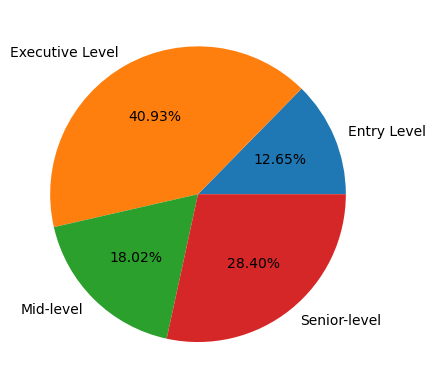

In [76]:
data2 = data.groupby(['experience_level'])['salary'].mean()
plt.pie(data2.values,labels = data2.index , autopct= '%.2f%%')
plt.show();

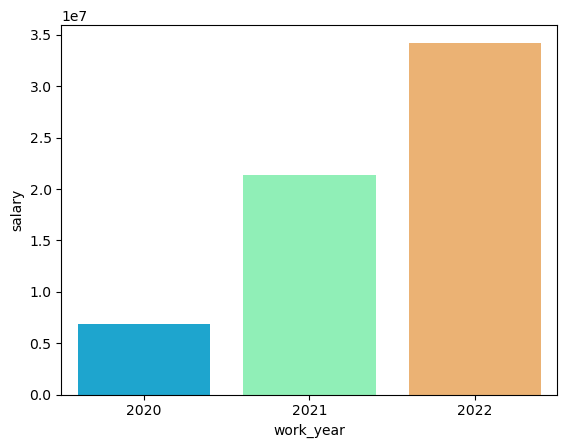

In [83]:
sns.barplot(data=data,x='work_year',y='salary',palette='rainbow',estimator=np.sum,ci=False)
plt.show();

In [84]:
data.head()

,work_year,experience_level,employment_type,job_title,salary,employee_residence,company_location,company_size,Workplace_models
0,2020,Mid-level,Full Time,Data Scientist,79833,DE,DE,Large,Onsite
1,2020,Senior-level,Full Time,Machine Learning Scientist,260000,JP,JP,Small,Onsite
2,2020,Senior-level,Full Time,Big Data Engineer,109024,GB,GB,Medium,Hybrid
3,2020,Mid-level,Full Time,Product Data Analyst,20000,HN,HN,Small,Onsite
4,2020,Senior-level,Full Time,Machine Learning Engineer,150000,US,US,Large,Hybrid


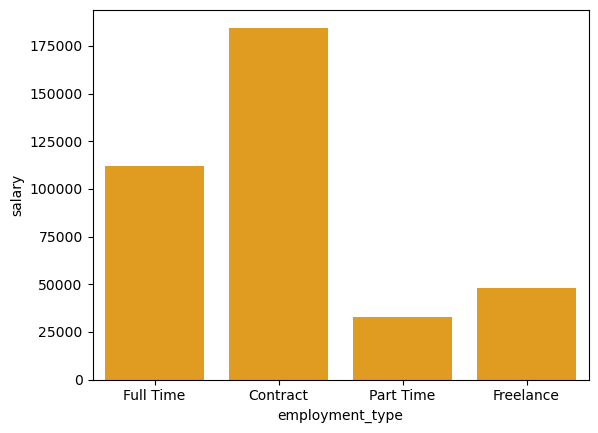

In [86]:
sns.barplot(x=data['employment_type'],y=data['salary'],ci=False,color='orange');

#### Bivariate Analysis -- Key Obserations

-- Highest Paid Job role is Data ANalytics Lead and Lowest paid Job role is 3D Computer Vision Researcher.

-- Salary is raising year by year

-- Executive Level is the highest paid job level.

-- Contract employment type employees are earning more.

### Multivariate Analysis

In [89]:
data.head()

,work_year,experience_level,employment_type,job_title,salary,employee_residence,company_location,company_size,Workplace_models
0,2020,Mid-level,Full Time,Data Scientist,79833,DE,DE,Large,Onsite
1,2020,Senior-level,Full Time,Machine Learning Scientist,260000,JP,JP,Small,Onsite
2,2020,Senior-level,Full Time,Big Data Engineer,109024,GB,GB,Medium,Hybrid
3,2020,Mid-level,Full Time,Product Data Analyst,20000,HN,HN,Small,Onsite
4,2020,Senior-level,Full Time,Machine Learning Engineer,150000,US,US,Large,Hybrid


In [97]:
pivot = data.pivot_table(values='salary',
                index='job_title',
                columns='work_year',
                 aggfunc='mean',
                 fill_value=0)

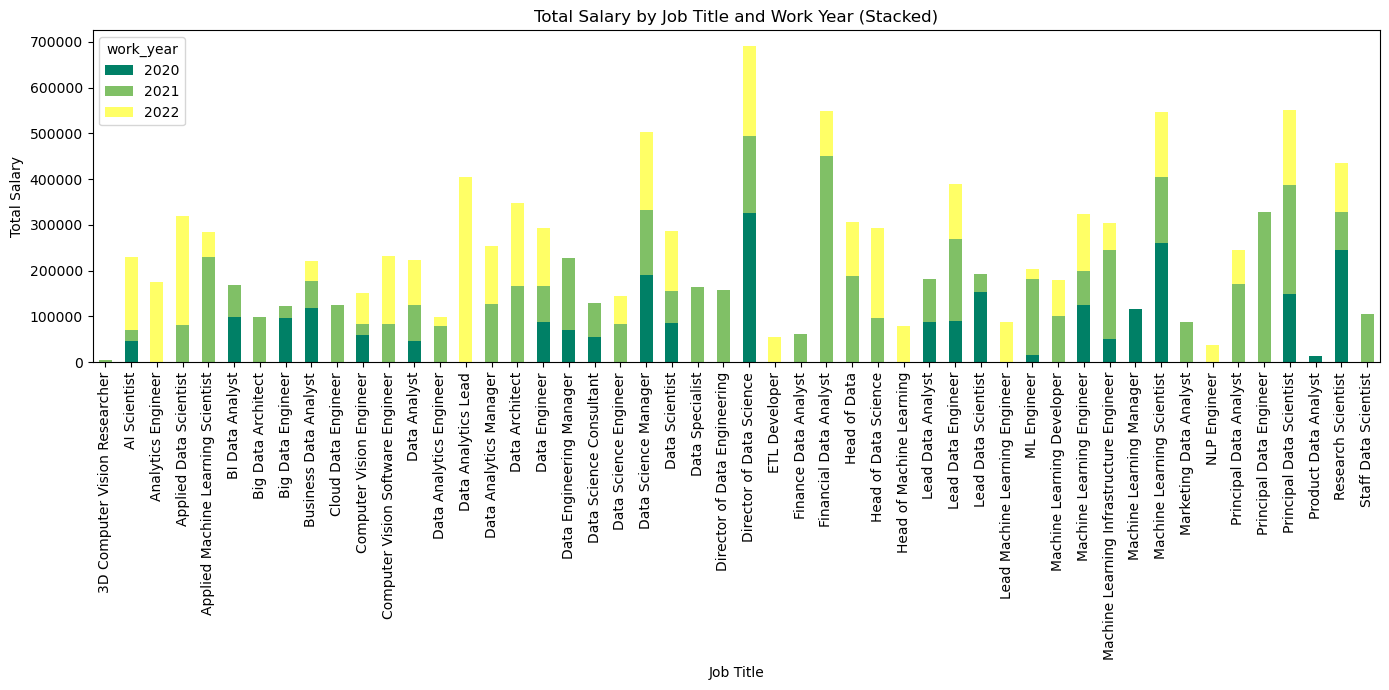

In [108]:
pivot.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='summer')
plt.title('Total Salary by Job Title and Work Year (Stacked)')
plt.xlabel('Job Title')
plt.ylabel('Total Salary')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Salaries for the Director of Data Science position remain consistently high across all years, while 3D Computer vision Researcher roles reflect the lowest compensation levels.

## Data Preprocessing

In [112]:
data

,work_year,experience_level,employment_type,job_title,salary,employee_residence,company_location,company_size,Workplace_models
0,2020,Mid-level,Full Time,Data Scientist,79833,DE,DE,Large,Onsite
1,2020,Senior-level,Full Time,Machine Learning Scientist,260000,JP,JP,Small,Onsite
2,2020,Senior-level,Full Time,Big Data Engineer,109024,GB,GB,Medium,Hybrid
3,2020,Mid-level,Full Time,Product Data Analyst,20000,HN,HN,Small,Onsite
4,2020,Senior-level,Full Time,Machine Learning Engineer,150000,US,US,Large,Hybrid
...,...,...,...,...,...,...,...,...,...
560,2022,Senior-level,Full Time,Data Engineer,154000,US,US,Medium,Remote
561,2022,Senior-level,Full Time,Data Engineer,126000,US,US,Medium,Remote
562,2022,Senior-level,Full Time,Data Analyst,129000,US,US,Medium,Onsite
563,2022,Senior-level,Full Time,Data Analyst,150000,US,US,Medium,Remote


In [113]:
data.drop(columns=['employee_residence','company_location'],inplace=True)

In [114]:
features = data.drop(columns='salary')
target = data['salary']

In [116]:
x_train,x_test,y_train,y_test = train_test_split(features,target,test_size=0.2,random_state=12)

In [134]:
cat_col = x_train.select_dtypes(include='object').columns.tolist()
num_col = x_train.select_dtypes(exclude='object').columns.tolist()

In [153]:
step1 = ColumnTransformer([
    ('ohe',OneHotEncoder(drop='first',handle_unknown='ignore'),cat_col)],
                         remainder='passthrough')

step2 = RandomForestRegressor(
    n_estimators=200,
    max_depth=10,              # Limits tree depth
    min_samples_split=5,       # Node must have at least 5 samples to split
    min_samples_leaf=2,        # Each leaf must have at least 2 samples
    max_features='sqrt',       # Controls number of features considered at each split
    random_state=42,
    n_jobs=-1
)

pipe = Pipeline([
    ('preprocessing',step1),
    ('model',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print(f"r2_score : {r2_score(y_test,y_pred)}")
print(f"mean_squared_error : {mean_squared_error(y_test,y_pred)}")

r2_score : 0.2621641113814347
mean_squared_error : 3844751527.2238865


In [154]:
step1 = ColumnTransformer([
    ('ohe',OneHotEncoder(drop='first',handle_unknown='ignore'),cat_col),
    ('rs',RobustScaler(),num_col)],
                         remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('preprocessing',step1),
    ('model',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print(f"r2_score : {r2_score(y_test,y_pred)}")
print(f"mean_squared_error : {mean_squared_error(y_test,y_pred)}")

r2_score : 0.23049301075975148
mean_squared_error : 4009784855.586459


In [168]:
step1 = ColumnTransformer([
    ('ohe',OneHotEncoder(drop='first',handle_unknown='ignore'),cat_col),
    ('rs',RobustScaler(),num_col)],
                         remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=15,p=2)

pipe = Pipeline([
    ('preprocessing',step1),
    ('model',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print(f"r2_score : {r2_score(y_test,y_pred)}")
print(f"mean_squared_error : {mean_squared_error(y_test,y_pred)}")

r2_score : 0.2324544658512172
mean_squared_error : 3999564008.9526453


## Prepruning technique

In [167]:
import optuna
from sklearn.model_selection import cross_val_score

def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 120, 300)
    max_depth = trial.suggest_int('max_depth', 5, 20)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 5)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2'])

    step1 = ColumnTransformer([
        ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_col),
        ('rs', RobustScaler(), num_col)
    ], remainder='passthrough')

    model = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=42,
        n_jobs=-1
    )

    pipe = Pipeline([
        ('preprocessing', step1),
        ('model', model)
    ])

    score = cross_val_score(pipe, x_train, y_train, cv=5, scoring='r2').mean()
    return score

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)


print("Best R² Score:", study.best_value)
print("Best Params:", study.best_params)


[I 2025-07-31 17:38:38,386] A new study created in memory with name: no-name-589dbf91-28d0-4cf6-b062-ff3ca147e9b1
[I 2025-07-31 17:38:40,649] Trial 0 finished with value: 0.10808809095005281 and parameters: {'n_estimators': 120, 'max_depth': 18, 'min_samples_split': 6, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 0 with value: 0.10808809095005281.
[I 2025-07-31 17:38:43,267] Trial 1 finished with value: 0.16589105923981118 and parameters: {'n_estimators': 145, 'max_depth': 12, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 1 with value: 0.16589105923981118.
[I 2025-07-31 17:38:48,424] Trial 2 finished with value: 0.14125468136687053 and parameters: {'n_estimators': 299, 'max_depth': 5, 'min_samples_split': 6, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 1 with value: 0.16589105923981118.
[I 2025-07-31 17:38:52,465] Trial 3 finished with value: 0.1128853831343889 and parameters: {'n_estimators': 235, 'max_depth': 

Best R² Score: 0.21476208138592554
Best Params: {'n_estimators': 174, 'max_depth': 15, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt'}


## Finally we get these scores
r2_score : 0.2621641113814347
mean_squared_error : 3844751527.2238865

By using Random Forest regressor.